# Stereo Camera Calibration


In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import glob


In [2]:
# termination criteria
subpix_criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.0001)
corners_criteria = cv.CALIB_CB_ADAPTIVE_THRESH + cv.CALIB_CB_NORMALIZE_IMAGE

nx = 9 #number of inside corners in x
ny = 6 #number of inside corners in y

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((nx*ny, 1, 3), np.float32)
objp[:, 0, :2] = np.mgrid[0:nx, 0:ny].T.reshape(-1, 2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints_left = [] # 2d points in image plane.
imgpoints_right = []
images_left = sorted(glob.glob('../assets/sample_images/left_*.jpg'))
images_right = sorted(glob.glob('../assets/sample_images/right_*.jpg'))


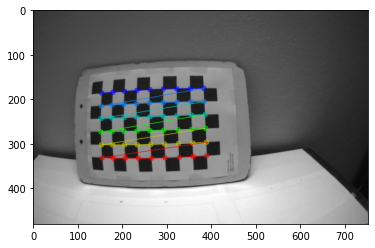

In [3]:
for fname in images_left:
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, (nx, ny), corners_criteria)

    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)

        win_size = (3, 3) # Change 'win_size' for accuracy. Default is (11,11).
        corners = cv.cornerSubPix(gray,corners, win_size, (-1, -1), subpix_criteria)
        imgpoints_left.append(corners)

        # Draw and display the corners
        cv.drawChessboardCorners(img, (nx, ny), corners, ret)
        plt.imshow(img)

for fname in images_right:
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, (nx,ny), corners_criteria)

    # If found, add object points, image points (after refining them)
    if ret == True:

        win_size = (3, 3) # Change 'win_size' for accuracy. Default is (11,11).
        corners = cv.cornerSubPix(gray,corners, win_size, (-1, -1), subpix_criteria)
        imgpoints_right.append(corners)

        # Draw and display the corners
        cv.drawChessboardCorners(img, (nx,ny), corners, ret)
        plt.imshow(img)
        

Make sure if length of objpoints = length of  imgpoints_left = length of imgpoints_right


In [4]:
print("Length of objpoints = ", len(objpoints))
print("Length of imgpoints_left = ", len(imgpoints_left))
print("Length of imgpoints_right = ", len(imgpoints_right))


Length of objpoints =  20
Length of imgpoints_left =  20
Length of imgpoints_right =  20


### Calibrate


In [5]:
_, K1, D1, _, _ = cv.calibrateCamera(objpoints, imgpoints_left, gray.shape[::-1], None, None)
_, K2, D2, _, _ = cv.calibrateCamera(objpoints, imgpoints_right, gray.shape[::-1], None, None)

flags = cv.CALIB_FIX_INTRINSIC
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 1e-6)
rms, K1, D1, K2, D2, R, T, _, _ = cv.stereoCalibrate(objpoints, imgpoints_left, imgpoints_right, K1, D1, K2, D2, gray.shape[::-1], criteria, flags)

flag = cv.CALIB_ZERO_DISPARITY
R1, R2, P1, P2, _, roi_left, roi_right = cv.stereoRectify(K1, D1, K2, D2, gray.shape[::-1], R, T, flags = flag, alpha=-1)


In [6]:
print("RMS = ", rms)


RMS =  0.15391087368923412


In [7]:
img = cv.imread('../assets/sample_imagesleft_5.jpg')

leftMapX, leftMapY = cv.initUndistortRectifyMap(K1, D1, R1, P1, gray.shape[::-1], cv.CV_16SC2)
left_rectified = cv.remap(img, leftMapX, leftMapY, cv.INTER_LINEAR, cv.BORDER_CONSTANT)


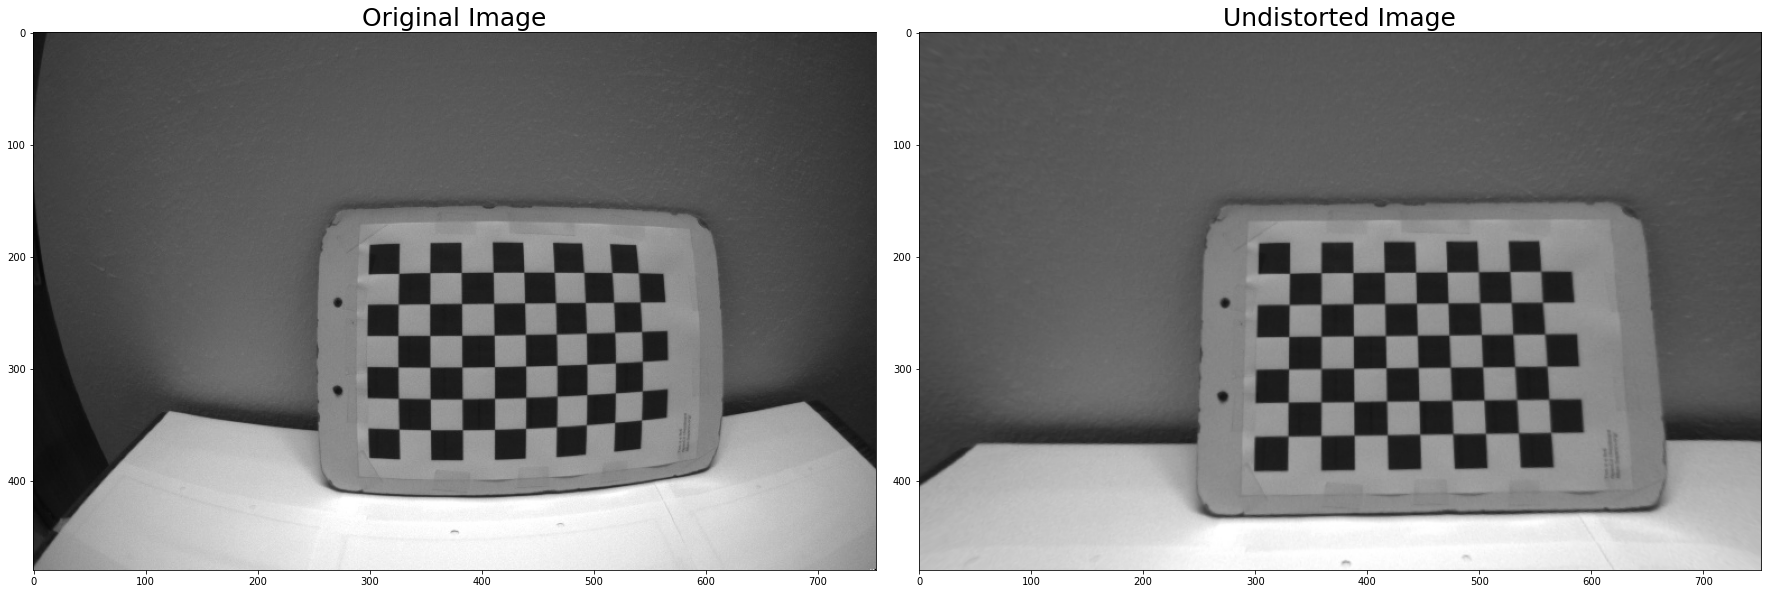

In [8]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize = 25)
ax2.imshow(left_rectified)
ax2.set_title('Undistorted Image', fontsize = 25)
plt.subplots_adjust(left = 0., right = 1, top = 0.9, bottom = 0.)


In [9]:
img = cv.imread('../assets/sample_images/right_5.jpg')

rightMapX, rightMapY = cv.initUndistortRectifyMap(K2, D2, R2, P2, gray.shape[::-1], cv.CV_16SC2)
right_rectified = cv.remap(img, rightMapX, rightMapY, cv.INTER_LINEAR, cv.BORDER_CONSTANT)


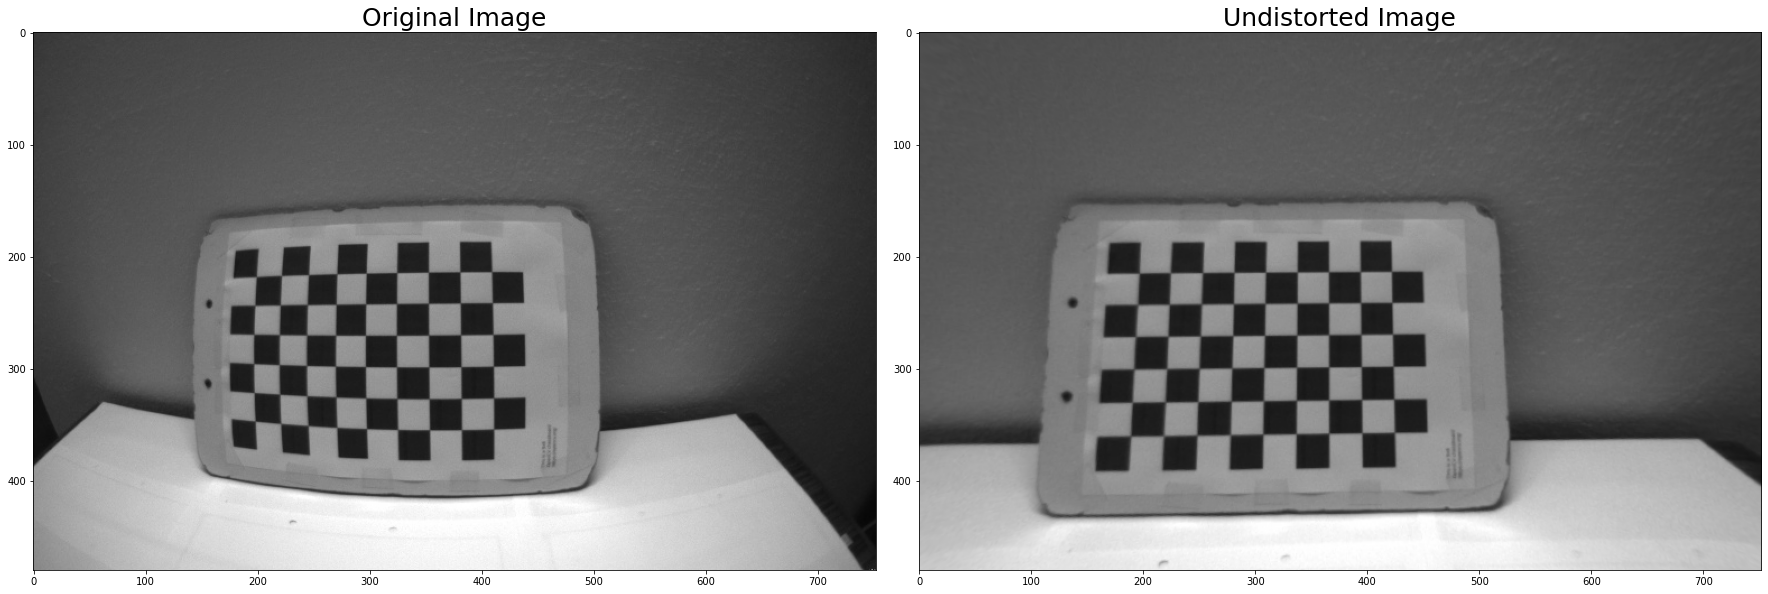

In [10]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize = 25)
ax2.imshow(right_rectified)
ax2.set_title('Undistorted Image', fontsize = 25)
plt.subplots_adjust(left = 0., right = 1, top = 0.9, bottom = 0.)


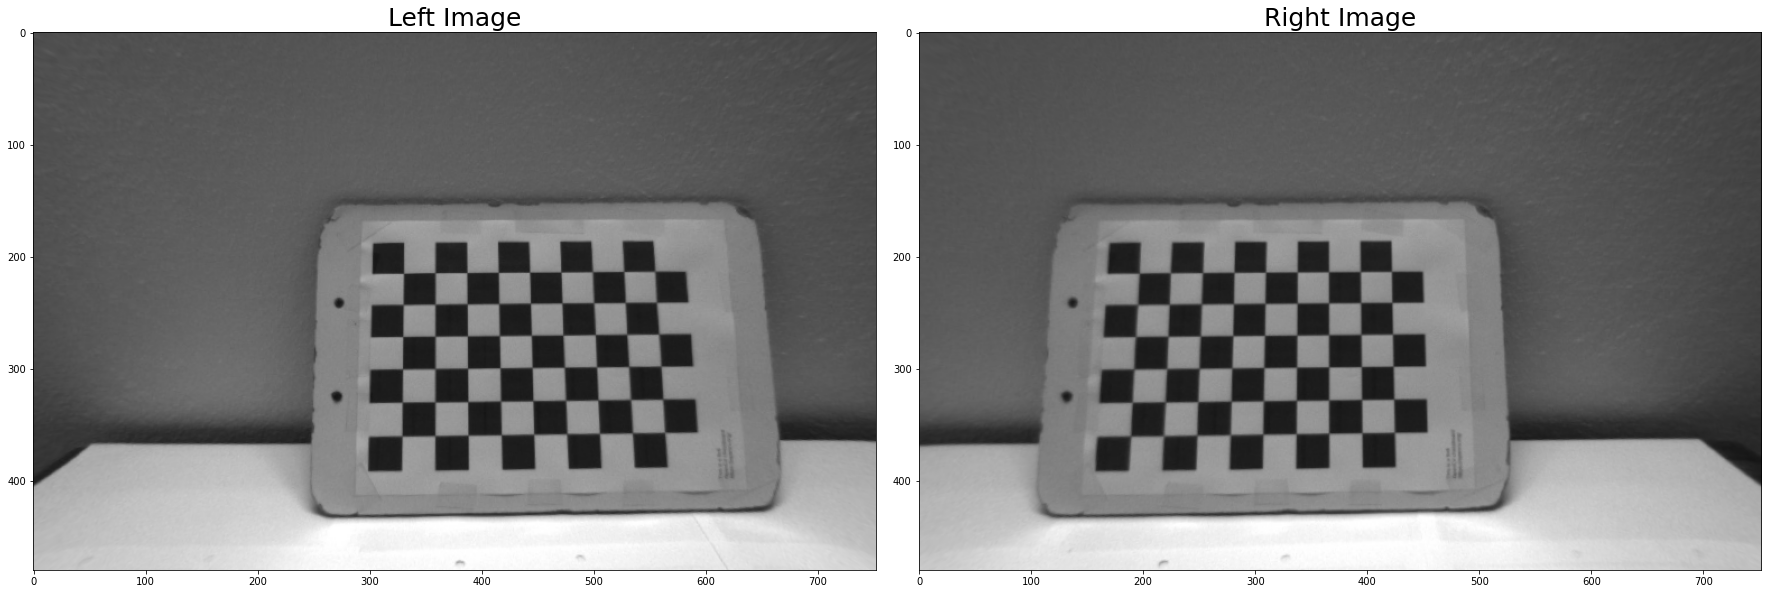

In [11]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(left_rectified)
ax1.set_title('Left Image', fontsize = 25)
ax2.imshow(right_rectified)
ax2.set_title('Right Image', fontsize = 25)
plt.subplots_adjust(left = 0., right = 1, top = 0.9, bottom = 0.)
